### This document demosntrate how we can build a sentiment analysis on IMDB data using word embedding. 
Here, I use the `keras` package, which interfaces to the
`tensorflow` package which in turn links to efficient `python` code. This code is
impressively fast, and the package is well-structured. 

Important note: This `iPython notebook` need following dependencies
`pandas`; `numpy`; `matplotlib` (for drawing figures); `keras` (for deep learning models); `tensorflow` (for running keres in the backend); If your machine don't have these libraries installed, you may see an error regarding this.


In [1]:
# First we import the dependencies a.k.a python libraries which we will need to accomplish this excersie
import pandas as pd  # pandas is a fast, powerful, flexible open source data analysis and manipulation tool
import numpy as np   # NumPy offers comprehensive mathematical functions 
import matplotlib.pyplot as plt #Matplotlib is a comprehensive library for creating visualizations in Python.
import tensorflow as tf     #TensorFlow is an end-to-end open source platform for machine learning.
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

import warnings
warnings.filterwarnings("ignore")

## IMDb Document Classification

Now we perform Sentiment Analysis on the `IMDB` dataset, which is available as part of the `keras` package. 
We  limit the dictionary size to the 10,000  most frequently-used words and tokens.

In [2]:
# Load dataset
num_distinct_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_distinct_words)
print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


Each element of `x_train` is a vector of numbers between 0 and
9999 (the document), referring to the words found in the dictionary.
For example, the first training document is the positive review on. Lets see the output and the review of first 
training data

In [3]:
# Pad all sequences
max_sequence_length = 200
padded_inputs = pad_sequences(x_train, maxlen=max_sequence_length, value = 0.0, padding='post', truncating ='post' ) # 0.0 because it corresponds with <PAD>
padded_inputs_test = pad_sequences(x_test, maxlen=max_sequence_length, value = 0.0, padding='post', truncating ='post') # 0.0 because it corresponds with <PAD>


In [4]:
# Obtain 3 texts
for i in range(0,3):
    INDEX_FROM=3   # word index offset
    word_to_id = imdb.get_word_index()
    word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
    word_to_id["<PAD>"] = 0
    word_to_id["<START>"] = 1
    word_to_id["<UNK>"] = 2
    word_to_id["<UNUSED>"] = 3
    
    id_to_word = {value:key for key,value in word_to_id.items()}
    print('=================================================')
    print(f'Sample = {i} | Length = {len(padded_inputs[i])} |', "Sentiment:", y_train[i])
    print('=================================================')
    print(' '.join(id_to_word[id] for id in padded_inputs[i] ))
    

Sample = 0 | Length = 200 | Sentiment: 1
<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children 

Now we're ready to build our simple neural network. We'll start by defining the type of model we want to build. 

In [5]:
tf.keras.backend.clear_session()

In [6]:
# Define the Keras model
model = Sequential()
model.add(Embedding(num_distinct_words, 20, input_length=max_sequence_length))
model.add(Dropout(0.50))
model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(Dropout(0.50))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.50))
model.add(Dense(1, activation='sigmoid'))

Now complile the model and see a graphical overview of the model 

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Give a summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 20)           200000    
_________________________________________________________________
dropout (Dropout)            (None, 200, 20)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 200, 32)           1312      
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 32)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 100, 32)           0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 3200)              0

In [8]:
# Train the model
history = model.fit(padded_inputs, y_train, epochs=10, batch_size=256, verbose=1, validation_split=0.2)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
78/79 [============================>.] - ETA: 0s - loss: 0.6938 - accuracy: 0.5028WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x1457e8830> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and att

(Here, I reduced the number of epochs to make
    runtimes manageable; for an optimal model you may need to increase the number of epoc e.g. 50,100)*

We can plot the `history` to display the error and accuracy for the training and validation data. 

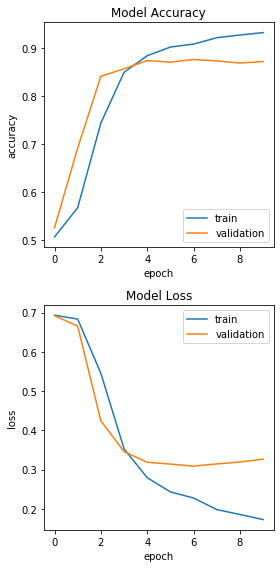

In [9]:
# plotting the error and accuracy metrics
fig = plt.figure(figsize =(4,8))
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')


plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.tight_layout()
plt.show()

Finally, lets evaluate how our model perform in the test data

In [10]:
test_results = model.evaluate(padded_inputs_test, y_test, verbose=False)
print(f'Test results - Loss: {np.round(test_results[0],4)} - Accuracy: {np.round(100*test_results[1],2)}%')

Test results - Loss: 0.3748 - Accuracy: 84.56%


This model takes 5 minutes to run and achieves 85% accuracy on the test
data. Although this is not terrible for 2-class data, given the simple architecture of the model (a random
classifier gets 50% accuracy).
Typically, it takes a lot of architecture carpentry,
fiddling with regularization, and time to achieve the perfect result.


### Word Embedding
Now lets look at the learned embedding of words in our dictionary 

In [11]:
# Get the word encoding from the "embedding" layer
weights = model.get_layer('embedding').get_weights()[0]

In [12]:
word = 'king' 
word_number = word_to_id.get(word)
print("Its vector values:", weights[word_number])

Its vector values: [-0.00873131  0.03420371 -0.01941963  0.02276299 -0.03335036  0.018992
 -0.01255463  0.06348497 -0.06582938  0.06057144  0.03291958 -0.0218301
 -0.04654805 -0.00793621  0.00760541 -0.00136135 -0.05946654  0.01694172
 -0.03151225  0.00238616]


Let's align each words with its associated word embedding 
by represeting word dictionary and their embedding in a pandas data frame

In [13]:
Word_df = pd.DataFrame.from_dict(id_to_word, orient='index', columns=['Word']).sort_index()
weigts_df = pd.DataFrame(weights)
Word_df = pd.concat([Word_df, weigts_df], axis=1)

#### Lets view a few words and their associated embedding in a 2D space. 
We only consider 300 words here. Remember our model is build on 10,000 words.

In [14]:
Word_df_sample = Word_df.iloc[300:600]
Word_df_sample.set_index('Word',inplace =True)

In [15]:
Word_df_sample.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Word,,,,,,,,,,,,,,,,,,,,
1,-0.058271,-0.035071,-0.100013,0.100189,0.033092,-0.102657,0.070699,-0.049904,0.021201,-0.052749,0.089251,0.083717,-0.080284,0.035533,0.023656,0.034390,0.018758,-0.010222,-0.004251,-0.061140
said,-0.023741,-0.019688,0.031774,0.058232,-0.033875,-0.032650,0.030206,-0.057291,-0.055940,0.036517,-0.002332,0.013962,-0.017573,0.045337,-0.047685,0.023433,0.012725,0.001753,-0.034934,-0.013675
effects,0.010973,-0.078924,-0.027829,0.097311,0.000875,-0.005154,0.093791,-0.003395,-0.050586,0.024380,0.002192,0.016799,0.014501,0.021273,0.027393,-0.002959,0.060263,0.067970,-0.000156,-0.042312
later,-0.007602,-0.005899,0.005834,-0.020460,0.015338,0.034601,0.021033,-0.033817,0.028196,0.012171,-0.028175,-0.037647,0.046707,-0.027009,-0.021423,0.007820,0.020532,-0.077080,-0.066339,0.027679
takes,-0.002689,0.048157,-0.005140,-0.041806,0.016828,0.007850,0.009182,0.013187,0.008057,0.018284,-0.064008,-0.001562,0.049587,-0.020277,-0.034572,0.049105,-0.037136,-0.021929,0.006677,-0.006337
instead,-0.033358,-0.061818,-0.068767,0.126844,0.031901,-0.105049,0.042891,-0.069297,-0.109399,0.015741,0.026934,0.143095,-0.072823,0.067624,0.126220,-0.029512,0.103327,0.096170,0.096757,-0.068281
seem,-0.060135,-0.017007,-0.090194,0.004818,-0.011300,-0.068770,0.025725,0.024702,-0.033038,0.022654,-0.029543,0.022948,-0.025736,0.000864,0.037981,0.044039,-0.009791,0.006396,-0.009598,0.042020
beautiful,-0.017068,0.009733,0.141492,-0.128389,0.029310,0.131283,-0.043907,0.149141,0.158502,0.020467,-0.016085,-0.104004,0.071770,-0.114146,-0.058054,-0.031863,-0.107078,-0.112766,-0.062335,-0.013000
john,-0.046858,-0.000724,0.037513,-0.043107,0.013803,-0.018466,-0.033916,0.017556,0.051696,0.026923,-0.020207,-0.013122,-0.009316,0.023668,-0.031719,-0.025045,-0.070670,-0.010686,-0.021556,-0.019561


#### Convert 20 dimensional embedding into two dimensional space using PCA 

In [16]:
X_corr=Word_df_sample.corr()

#Computing eigen values and eigen vectors
values,vectors=np.linalg.eig(X_corr)

#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

#Taking first 2 components which explain maximum variance for projecting
new_vectors=vectors[:,:2]

#Projecting it onto new dimesion with 2 axis
neww_X=np.dot(Word_df_sample,new_vectors)

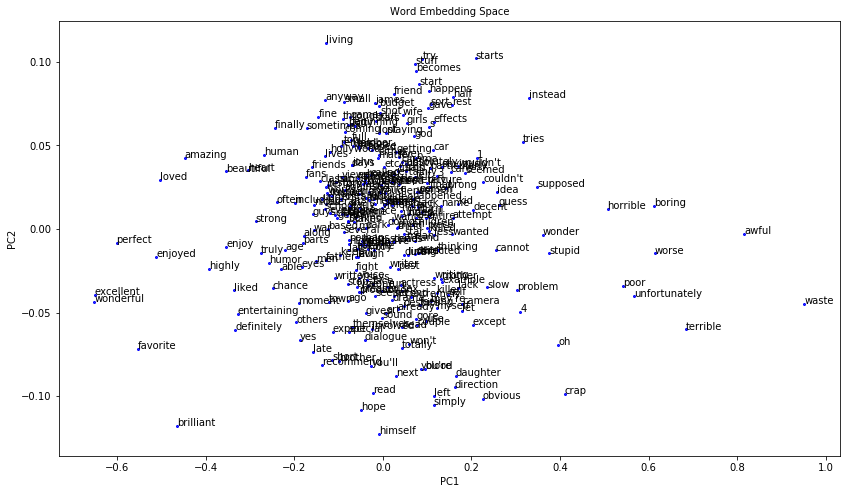

In [22]:
plt.figure(figsize=(14,8))
plt.scatter(neww_X[:,0],neww_X[:,1], linewidths=2, s = 1, color='blue',)
plt.xlabel("PC1",size=10)
plt.ylabel("PC2",size=10)
plt.title("Word Embedding Space",size=10)
vocab=list(Word_df_sample.index)
for i, word in enumerate(vocab):
    plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]),color='black')
    
